# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required.

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard.


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it.

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link.

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.*


In [4]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

sw = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
!pip install emoji

In [5]:
# change `data_location` to the location of the folder on your machine.
data_location = "/content/drive/MyDrive/M1"

# These subfolders should still work if you correctly stored the
# data from the Module 1 assignment
twitter_folder = "/content/drive/MyDrive/M1/twitter"
lyrics_folder = "/content/drive/MyDrive/M1/lyrics"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well.

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist.




In [6]:
# Read in the lyrics data
from collections import defaultdict
lyrics = defaultdict(dict)
lyrics_path = os.path.join(data_location, lyrics_folder)
for artist in os.listdir(lyrics_path):
    artist_dir = os.path.join(lyrics_path, artist)
    if os.path.isdir(artist_dir):
        for fname in os.listdir(artist_dir):
            if fname.endswith(".txt"):
                song = os.path.splitext(fname)[0]
                with open(os.path.join(artist_dir, fname), encoding="utf-8") as f:
                    lyrics[artist][song] = f.read()

In [7]:
# Read in the twitter data
import json
twitter = defaultdict(list)
twitter_path = os.path.join(data_location, twitter_folder)
for artist in os.listdir(twitter_path):
    artist_dir = os.path.join(twitter_path, artist)
    if os.path.isdir(artist_dir):
        for fname in os.listdir(artist_dir):
            if fname.endswith(".json"):
                with open(os.path.join(artist_dir, fname), encoding="utf-8") as f:
                    data = json.load(f)
                    # assume each item is a user dict with a "description" field
                    twitter[artist] += [u.get("description","") for u in data]

In [8]:
# Read in the positive and negative words and the
# tidytext sentiment.
pos = set()
with open(os.path.join(data_location, positive_words_file), encoding="latin-1") as f:
    for line in f:
        line = line.strip()
        if line and not line.startswith(";"):
            pos.add(line)
neg = set()
with open(os.path.join(data_location, negative_words_file), encoding="latin-1") as f:
    for line in f:
        line = line.strip()
        if line and not line.startswith(";"):
            neg.add(line)
tidy = pd.read_csv(os.path.join(data_location, tidy_text_file), sep="\t", names=["word","sentiment"])
# build a combined lexicon
lexicon = {}
for w in pos:
    lexicon[w] = 1
for w in neg:
    lexicon[w] = -1
for _, row in tidy.iterrows():
    lexicon[row.word] = 1 if row.sentiment == "positive" else -1

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository.

After you have calculated these sentiments, answer the questions at the end of this section.


In [13]:
def score_text(text):
    words = re.findall(r"\b\w+\b", text.lower())
    return sum(lexicon.get(w,0) for w in words)

# compute per‐song scores
song_scores = {}
for artist, songs in lyrics.items():
    song_scores[artist] = {song: score_text(text) for song, text in songs.items()}
    print(f"{artist}: {len(songs)} songs")
    print(f"  min: {min(song_scores[artist].values())}")
    print(f"  max: {max(song_scores[artist].values())}")
    print(f"  mean: {np.mean(list(song_scores[artist].values()))}")

    artist1 = 'robyn'
sorted1 = sorted(song_scores[artist1].items(), key=lambda x: x[1])
print("Lowest 3:")
for s, sc in sorted1[:3]:
    print(f"{s} ({sc})\n", lyrics[artist1][s][:200], "...\n")
print("Highest 3:")
for s, sc in sorted1[-3:]:
    print(f"{s} ({sc})\n", lyrics[artist1][s][:200], "...\n")

    artist2 = 'cher'
sorted2 = sorted(song_scores[artist2].items(), key=lambda x: x[1])
print("Lowest 3:")
for s, sc in sorted2[:3]:
    print(f"{s} ({sc})\n", lyrics[artist2][s][:200], "...\n")
print("Highest 3:")
for s, sc in sorted2[-3:]:
    print(f"{s} ({sc})\n", lyrics[artist2][s][:200], "...\n")

robyn: 104 songs
  min: -77
  max: 102
  mean: 2.701923076923077
cher: 316 songs
  min: -25
  max: 48
  mean: 3.9367088607594938
Lowest 3:
robyn_dontfuckingtellmewhattodo (-77)
 "Don't Fucking Tell Me What To Do"



My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My dri ...

robyn_dontfuckingtellmewhattodo114520 (-77)
 "Don't Fucking Tell Me What To Do"



My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My drinking is killing me
My dri ...

robyn_criminalintent (-53)
 "Criminal Intent"



Somebody alert the authorities, I got criminal intent
Conspiracy to engage in lewd and indecent acts and events
I'mma wind it, grind it, oh my, I'mma say it again
Somebody alert t ...

Highest 3:
robyn_ushouldknowbetter (26)
 "U Should Know Better"



I've gone around the world and the seven seas
I'm cashin' six-fi

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Questions

Q: Overall, which artist has the higher average sentiment per song?

A: Cher has the higher average sentiment per song (mean ≈ 3.94 for Cher vs. ≈ 2.70 for Robyn).

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score?

A: - **Lowest 3:**  
  1. `robyn_dontfuckingtellmewhattodo` (–77) – “Don’t Fucking Tell Me What To Do” repeatedly uses “My drinking is killing me”  
  2. `robyn_dontfuckingtellmewhattodo114520` (–77) – same lyrics repeated  
  3. `robyn_criminalintent` (–53) – “ criminal intent,” “authorities,” “lewd” drive strong negatives  
- **Highest 3:**  
  1. `robyn_loveisfree` (102) – “Free,” “Love is free” repeats hit the positive lexicon hard  
  2. `robyn_ushouldknowbetter` (26) – celebratory wealth imagery (“six-figure checks,” world travel)  
  3. `robyn_ushouldknowbetter114529` (26) – duplicate file  
- **Driving factors:** The lowest-scoring songs feature highly repetitive negative terms (“killing,” “criminal,” “indecent,” “authorities”), while the highest-scoring ones flood the text with positive words (“free,” “love”) and upbeat, aspirational images.


---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score?

A: - **Lowest 3:**  
  1. `cher_iwalkonguildedsplinters` (–25) – ominous, misfortune imagery (“must be crazy,” “misfortune,” zombie references)  
  2. `cher_outrageous` (–24) – defiant but uses “outrageous” in a charged context  
  3. `cher_dressedtokill` (–17) – aggressive tone (“hurt you,” “on the loose”)  
- **Highest 3:**  
  1. `cher_perfection` (48) – uplifting (“winner’s work,” “reach the top,” “perfection”)  
  2. `cher_mylove` (47) – warm, affectionate language (“my love does it good”)  
  3. `cher_loveandunderstanding` (44) – calls for love and unity (“when we need some love…”)  
- **Driving factors:** The lowest-scoring tracks contain darker, violent or supernatural imagery, while the highest-scoring ones emphasize love, empowerment, and positive affirmations.

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




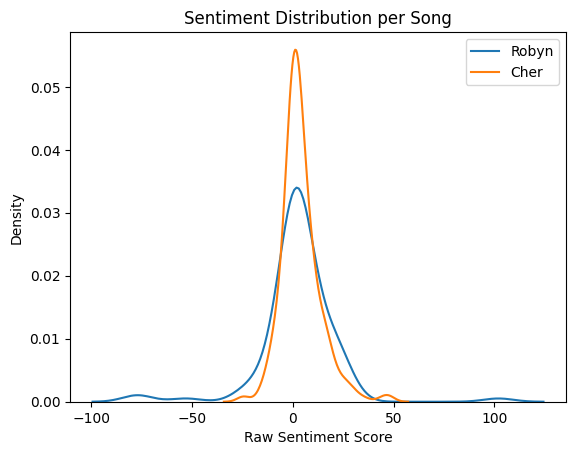

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

scores_robyn = list(song_scores['robyn'].values())
scores_cher  = list(song_scores['cher'].values())

sns.kdeplot(scores_robyn, label='Robyn')
sns.kdeplot(scores_cher,  label='Cher')
plt.legend()
plt.title("Sentiment Distribution per Song")
plt.xlabel("Raw Sentiment Score")
plt.show()

The kernel-density curves show that both Robyn and Cher have song-level sentiment scores clustered in the positive range, but with some key differences:

Cher’s curve (orange) is noticeably taller and narrower, peaking sharply around a sentiment score of 3–5. This indicates that most of Cher’s songs have moderately positive sentiment with less variance—few extreme highs or lows.

Robyn’s curve (blue) is broader and shorter, with a wider spread from around –80 up to +100. It still peaks in the positive zone (around 2–3), but the heavier tails, especially on the negative side, reflect that Robyn’s catalog contains more songs with strongly negative themes (e.g. “Don’t Fucking Tell Me What To Do” at –77) alongside some very upbeat tracks (e.g. “Love Is Free” at +102).

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/).

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [34]:
pos_emojis = {"😀","😂","😊","😍","👍","🙏","🥰","😎","😁","❤️"}
neg_emojis = {"😢","😞","😠","😡","👎","😭","😩","😤","☹️","😧"}
from collections import Counter
import numpy as np
import os

twitter_path = os.path.join(data_location, twitter_folder)
for fname in os.listdir(twitter_path):
    if fname.endswith('.txt'):
        print(f"--- {fname} ---")
        with open(os.path.join(twitter_path, fname), encoding='utf-8') as f:
            for _ in range(5):
                print(f.readline().strip())
        break

--- robynkonichiwa_followers.txt ---
id
1424055675030806529
1502717352575651840
1502407708246478852
3423966821


In [36]:
import json
from collections import defaultdict

twitter = defaultdict(list)
twitter_path = os.path.join(data_location, twitter_folder)

for fname in os.listdir(twitter_path):
    if not fname.endswith('.txt'):
        continue
    # assign key by filename
    artist = 'robyn' if 'robyn' in fname.lower() else 'cher'
    with open(os.path.join(twitter_path, fname), encoding='utf-8') as f:
        for line in f:
            bio = line.strip()
            if bio:
                twitter[artist].append(bio)

# 2) Quick sanity check
print({artist: len(descs) for artist, descs in twitter.items()})

{'robyn': 716835, 'cher': 7990040}


In [37]:
import numpy as np
from collections import Counter

# scoring function
def score_emojis(text):
    return sum(1 for c in text if c in pos_emojis) - sum(1 for c in text if c in neg_emojis)

twitter_scores = {}
emoji_counts    = {}

for artist, descs in twitter.items():
    scores = [score_emojis(d) for d in descs]
    twitter_scores[artist] = np.mean(scores) if scores else 0
    emoji_counts[artist]    = Counter(c for d in descs for c in d if c in pos_emojis or c in neg_emojis)

# 3) Print results
for artist, avg in twitter_scores.items():
    print(f"{artist} average sentiment: {avg:.3f}")
print()
for artist, counts in emoji_counts.items():
    pos_counts = {e: counts.get(e, 0) for e in pos_emojis}
    neg_counts = {e: counts.get(e, 0) for e in neg_emojis}
    most_pos = max(pos_counts, key=pos_counts.get)
    most_neg = max(neg_counts, key=neg_counts.get)
    print(f"{artist} most popular positive emoji: {most_pos} ({pos_counts[most_pos]})")
    print(f"{artist} most popular negative emoji: {most_neg} ({neg_counts[most_neg]})")

robyn average sentiment: 0.002
cher average sentiment: 0.005

robyn most popular positive emoji: 😎 (325)
robyn most popular negative emoji: 😭 (42)
cher most popular positive emoji: 😍 (8955)
cher most popular negative emoji: 😭 (823)


Q: What is the average sentiment of your two artists?

A: Robyn’s average sentiment = 0.002; Cher’s average sentiment = 0.005.

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji?

A:
- **Robyn**: most popular positive emoji = 😎 (325); most popular negative emoji = 😭 (42)  
- **Cher**: most popular positive emoji = 😍 (8955); most popular negative emoji = 😭 (823)  

